In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import datetime
import numpy as np

## Washington DC

In [68]:
dctrips = pd.read_csv('../Data/WashingtonDC/alldata_WashingtonDC.csv')
temp = pd.DatetimeIndex(dctrips['Start date'])
dctrips['start_day'] = temp.date
dctrips['start_time'] = temp.time
dctrips['riderateWashingtonDC'] = np.ones(len(temp))


In [70]:
groupdctrips = dctrips.groupby('start_day', as_index=False)
sumdctrip = groupdctrips.sum()

## Bay Area

In [62]:
bayareatrips = pd.read_csv('../Data/BayArea/alldata_bayarea.csv')
temp = pd.DatetimeIndex(bayareatrips['Start Date'])
bayareatrips['start_day'] = temp.date
bayareatrips['start_time'] = temp.time
bayareatrips['riderateBayArea'] = np.ones(len(temp))


In [63]:
groupbayareatrips = bayareatrips.groupby('start_day', as_index=False)
sumbayareatrip = groupbayareatrips.sum()

## Boston

In [57]:
bostontrips = pd.read_csv('../Data/Boston/hubway_trips.csv')
temp = pd.DatetimeIndex(bostontrips['start_date'])
bostontrips['start_day'] = temp.date
bostontrips['start_time'] = temp.time
bostontrips['riderateBoston'] = np.ones(len(temp))


In [58]:
groupbostontrips = bostontrips.groupby('start_day', as_index=False)
sumbostontrip = groupbostontrips.sum()

## Minneapolis

In [53]:
minntrips = pd.read_csv('../Data/Minneapolis/alldata_minneapolis.csv')
temp = pd.DatetimeIndex(minntrips['Start date'])
minntrips['start_day'] = temp.date
minntrips['start_time'] = temp.time
minntrips['riderateMinneapolis'] = np.ones(len(temp))

In [54]:
groupminntrips = minntrips.groupby('start_day', as_index=False)
summinntrip = groupminntrips.sum()

In [30]:
#sumtrip.to_csv('../Data/Boston/sumtripBoston.csv')

## New York City

In [31]:
nyc = pd.read_csv('../Data/NYC/alldata.csv')
nyc = nyc.rename(columns = 
        {'Trips over the past 24-hours (midnight to 11:59pm)': 'riderateNYC'})
temp = pd.DatetimeIndex(nyc['Date'])
nyc['start_day'] = temp.date

## Merge data

In [91]:
#trips = trips.merge(nyc, on='start_day', how='outer')
mergetrip = sumbostontrip.merge(nyc, on='start_day', how='outer')
mergetrip = mergetrip.merge(summinntrip, on='start_day', how='outer')
mergetrip = mergetrip.merge(sumbayareatrip, on='start_day', how='outer')
mergetrip = mergetrip.merge(sumdctrip, on='start_day', how='outer')
#mergetrip.to_csv('../Data/Boston/BostonNYCMinnBayAreaDC.csv')
#sumtrip = pd.read_csv('../Data/Boston/sumtripBoston.csv')
#sumtrip = sumtrip.merge(nyc, on='start_day', how='outer')

## Plot rider growth

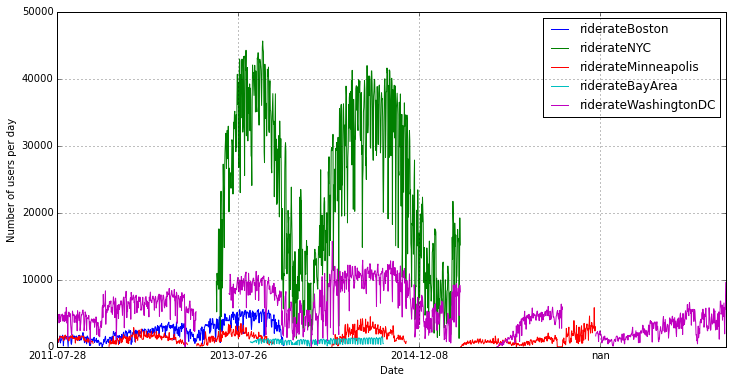

In [92]:
#riderate = mergetrip[['start_day','riderateBoston', 'riderateNYC', 'riderateMinneapolis', 'riderateBayArea']]
riderate = mergetrip[['start_day','riderateBoston', 'riderateNYC', \
                      'riderateMinneapolis', 'riderateBayArea', 'riderateWashingtonDC']]
riderate.plot(x='start_day', figsize=(12,6))
plt.xlabel('Date')
plt.ylabel('Number of users per day')

# Note to self: important features should include day of week and day of year

In [94]:
mergetrip.columns

Index([u'start_day', u'seq_id', u'hubway_id', u'duration', u'strt_statn', u'end_statn', u'birth_date', u'riderateBoston', u'Unnamed: 0_x', u'24-Hour Passes Purchased (midnight to 11:59 pm)', u'24-Hour Passes Purchased (midnight to 11:59 pm)\t7-Day Passes Purchased (midnight to 11:59 pm)', u'7-Day Passes Purchased (midnight to 11:59 pm)', u'Annual Member Sign-Ups (midnight to 11:59 pm)', u'Cumulative trips (since launch):', u'Date', u'Miles traveled to date:', u'Miles traveled today (midnight to 11:59 pm)', u'Total Annual Members', u'Total Annual Members (All Time)', u'Total Annual Memberships Sold', u'riderateNYC', u'Unnamed: 0_y', u'Total duration (ms)_x', u'riderateMinneapolis', u'Unnamed: 0_x', u'Bike #', u'Duration', u'End Terminal', u'Start Terminal', u'Trip ID', u'riderateBayArea', u'Unnamed: 0_y', u'Total duration (ms)_y', u'riderateWashingtonDC'], dtype='object')